# **Top 5 HRs players from 2022 season ([Baseball Reference](https://www.baseball-reference.com/)) and ([Savant](https://baseballsavant.mlb.com/))** 
### Aaron judge, Kyle Schwarber, Austin Riley, Pete Alonso, Mike Trout


### **Glossary:**
- Strikeout rate: Percentage of all plate appearances ending with a Strikeout
- Exit Velocity: Average speed of the ball off the bat for balls put into play, measured in miles per hour
- Hard Hit: Percent of balls in play with an exit velocity of 95 mph or more
- Whiff: This metric calculates the percentage of swings that result in a miss by the hitter
- Isolated Power(ISO): Batter's raw power by focusing on their ability to hit for extra bases, specifically extra-base hits (doubles, triples, and home runs)
- In Zone Contact: The percentage of contact made by hitters on swings at pitches within the strike zone
- Out of Zone Contact: The percentage of contact made by hitters on swings at pitches outside the strike zone

---

|Stats|AVG|OPS|HR|RBI|Hard Hit%|ISO|In Zone Contact%|Out of Zone Contact%|
|-|-|-|-|-|-|-|-|-|
|Aaron Judge|0.311|1.111|62|131|61.8|0.375|79.7|46.5|
|Kyle Schwarber|0.218|0.827|46|94|54.4|0.286|77.1|52.3|
|Mike Trout|0.283|0.999|40|80|51.0|0.347|75.8|53.1|
|Pete Alonso|0.271|0.870|40|131|44.8|0.247|84.3|61.9|
|Austin Riley|0.273|0.877|38|93|50.8|0.255|81.3|52.3|

## This advanced stats provide a perspective on the difficulty of achieving their home run numbers and whether they excel in other aspects of the game as well. 
> With these advanced stats, we can gain a deeper understanding of the top HR hitters approach at the plate, their ability to make contact, their plate discipline, and their overall effectiveness. It allows for a more comprehensive analysis of their performance and helps determine if their home run production is accompanied by other strong plate skills.


|Stats(%)|Top5 HR players|MLB average|
|-|-|-|
|Strikeout rate |25.1|22.4|
|Pitches per Plate Appearance|4.10|3.89|
|Hard Hit|52.5|38.4|
|Exit Velocity |92.6 mph|88.6 mph|
|Isolated Power(ISO) |0.301|0.154|
|Whiff |28.1|25.5|

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
mlb_2022 = pd.read_csv('2022_savant_stats.csv')
mlb_2022.head()

,name,year,player_age,ab,pa,hit,single,double,triple,home_run,...,isolated_power,rbi,b_total_bases,r_total_stolen_base,exit_velocity_avg,hard_hit_percent,oz_contact_percent,pitch_count,iz_contact_percent,whiff_percent
0,Albert Pujols,2022,42,307,351,83,45,14,0,24,...,0.280,68,169,1,91.2,47.3,64.0,1385,88.0,21.3
1,Miguel Cabrera,2022,39,397,433,101,86,10,0,5,...,0.063,43,126,1,89.9,38.2,57.7,1643,80.6,27.0
2,Yadier Molina,2022,39,262,270,56,43,8,0,5,...,0.088,24,79,2,84.7,26.0,71.4,986,81.0,22.0
3,Nelson Cruz Jr.,2022,41,448,507,105,79,16,0,10,...,0.103,64,151,4,90.9,46.1,49.2,1992,76.8,32.0
4,David Peralta,2022,34,439,490,110,65,30,3,12,...,0.164,59,182,1,90.3,44.4,50.2,1830,85.7,26.2


In [106]:
top5_hr_players = mlb_2022[mlb_2022['home_run'] >= 30].nlargest(5, 'home_run')
more_hr_players = mlb_2022[mlb_2022['home_run'] >= 30]
less_hr_players = mlb_2022[mlb_2022['home_run'] < 30]
count = len(more_hr_players)
#strikeout_rate = more_hr_players['so'] / more_hr_players['pa']  
#average_strikeout_rate = strikeout_rate.mean()



#print("Average Strikeout Rate for players with 30+ home runs:", average_strikeout_rate)


print(top5_hr_players[['name','rbi', 'home_run', 'batting_avg', 'on_base_plus_slg', 'isolated_power', 'hard_hit_percent', 'iz_contact_percent', 'oz_contact_percent']])
print("Total players with 30 or more home runs:", count)

               name  rbi  home_run  batting_avg  on_base_plus_slg   
86      Aaron Judge  131        62        0.311             1.111  \
212  Kyle Schwarber   94        46        0.218             0.827   
57       Mike Trout   80        40        0.283             0.999   
157     Pete Alonso  131        40        0.271             0.870   
230    Austin Riley   93        38        0.273             0.877   

     isolated_power  hard_hit_percent  iz_contact_percent  oz_contact_percent  
86            0.375              61.8                79.7                46.5  
212           0.286              54.4                77.1                52.3  
57            0.347              51.0                75.8                53.1  
157           0.247              44.8                84.3                61.9  
230           0.255              50.8                81.3                52.3  
Total players with 30 or more home runs: 23


In [62]:
more_rbi_players = mlb_2022[mlb_2022['rbi'] >= 70]
less_rbi_players = mlb_2022[mlb_2022['rbi'] < 30]
count1 = len(more_rbi_players)
print(more_rbi_players[['name','rbi']])
print( count1)

                 name  rbi
6    Charlie Blackmon   78
10      Justin Turner   81
21   Paul Goldschmidt  115
28    Freddie Freeman  100
32      Anthony Rizzo   75
..                ...  ...
281        Will Smith   87
291    Yordan Alvarez   97
305   Julio Rodriguez   75
307    Bobby Witt Jr.   80
315     Andrew Vaughn   76

[67 rows x 2 columns]
67


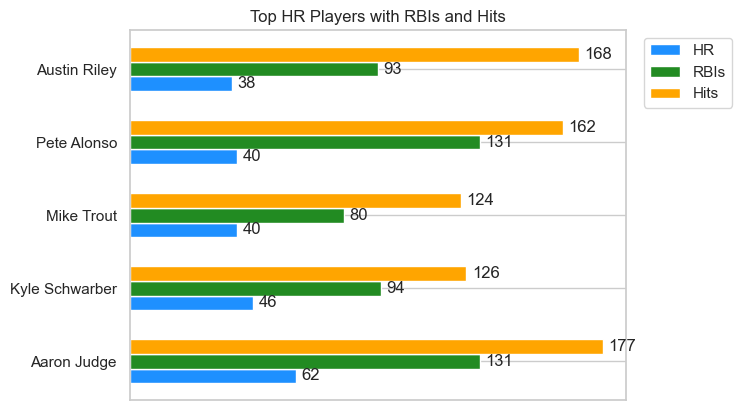

In [103]:
players = top5_hr_players['name']
hr = top5_hr_players['home_run']
rbi = top5_hr_players['rbi']
h = top5_hr_players['hit']

# Set up the figure and axes
fig, ax = plt.subplots()

# Create the bar chart
index = range(len(players))
bar_width = 0.2

# Plotting HR
hr_bars = ax.barh(index, hr, bar_width, label='HR', color='dodgerblue')

# Plotting RBI
rbi_bars = ax.barh([i + bar_width for i in index], rbi, bar_width, label='RBIs', color='forestgreen')

# Plotting Hits
h_bars = ax.barh([i + bar_width * 2 for i in index], h, bar_width, label='Hits', color='orange')
#so_bars = ax.barh([i + bar_width * 3 for i in index], so, bar_width, label='Strikeouts', color='purple')

# Set the x-axis tick positions and labels
ax.set_yticks([i + bar_width for i in index])
ax.set_yticklabels(players)
ax.set_xticks([])

def add_value_annotations(bars, distance):
    for bar in bars:
        width = bar.get_width()
        plt.text(width + distance, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Set the y-axis label
#ax.set_ylabel('Names')

# Set the title
ax.set_title('Top HR Players with RBIs and Hits')

# Display the legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
add_value_annotations(hr_bars, 2)

# Add value annotations to RBI bars
add_value_annotations(rbi_bars, 2)

# Add value annotations to OPS bars
add_value_annotations(h_bars, 2)
#add_value_annotations(so_bars, 2)


# Show the bar chart
plt.show()

# ***Top 30+ HRs Players with RBIs and Hits*** 
### Aaron judge, Kyle Schwarber, Austin Riley, Pete Alonso, Mike Trout
---
## I want to compare other stats to see how hard is to get this stats in a season.


|Stats(%average)|Top5 HR players|MLB average|
|-|-|-|
|Strikeout rate |25.1|22.4|
|Pitches per Plate Appearance|4.10|3.89|
|Hard Hit |52.5|38.4|
|Exit Velocity |92.6 mph|88.6 mph|
|Isolated Power(ISO) |0.301|0.154|
|Whiff |28.1|25.5|

In [92]:
mlb_average_pitches_per_pa = 708540 / 182051
mlb_strikeout_rate = 40812 / 182051 * 100
hard_hit_league = 38.4
exit_velocity_league = 88.6	
oz_contact_percent_league = 57.1
iz_contact_percent_league = 81.8
whiff_league = 25.5
mlb_200_pa_in_zone = mlb_2022['iz_contact_percent'].mean()
mlb_200_pa_iso = mlb_2022['isolated_power'].mean()
print(mlb_average_pitches_per_pa)
print(mlb_200_pa_iso)
print(top5_hr_players['isolated_power'].mean())
print(mlb_strikeout_rate)
print(top5_hr_players['whiff_percent'].mean())

3.8919863115280884
0.15469085173501576
0.30199999999999994
22.417893886877852
28.160000000000004


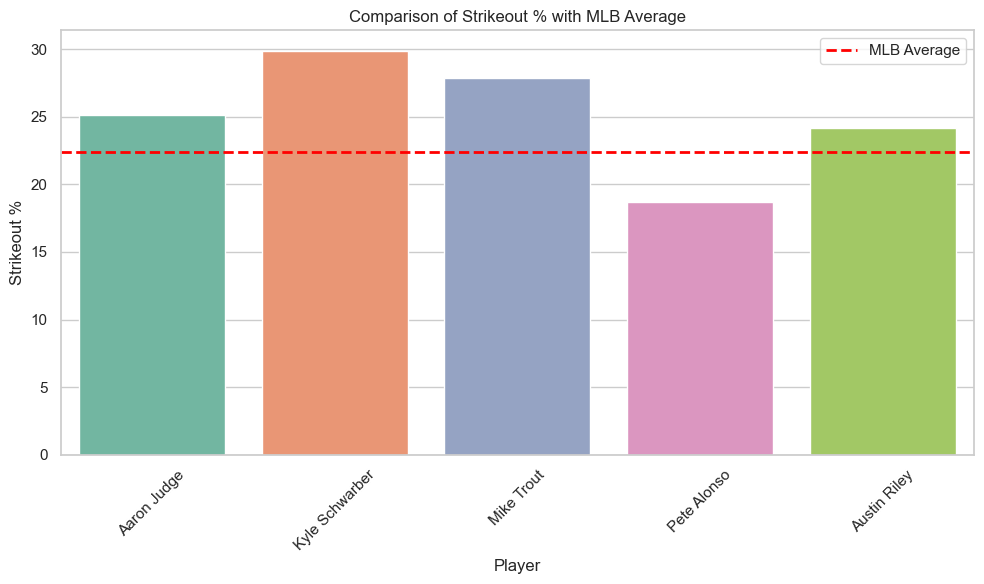

In [65]:


plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='k_percent', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=mlb_strikeout_rate, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('Strikeout %')
plt.title('Comparison of Strikeout % with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

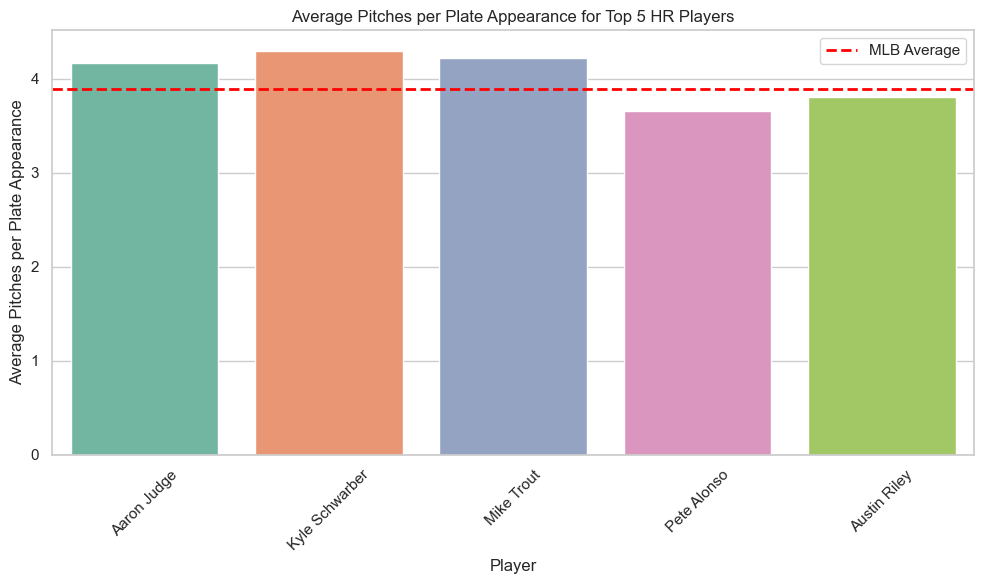

In [66]:

average_pitches = top5_hr_players['pitch_count'] / top5_hr_players['pa']
comparison_df = pd.DataFrame({'Player': top5_hr_players['name'],
                             'Average Pitches per PA': average_pitches})


# Set the plot labels and title
plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df, x='Player', y='Average Pitches per PA', palette='Set2')
plt.axhline(y=mlb_average_pitches_per_pa, color='red', linestyle='--', linewidth=2, label='MLB Average')
plt.title("Average Pitches per Plate Appearance for Top 5 HR Players")
plt.xlabel("Player")
plt.ylabel("Average Pitches per Plate Appearance")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

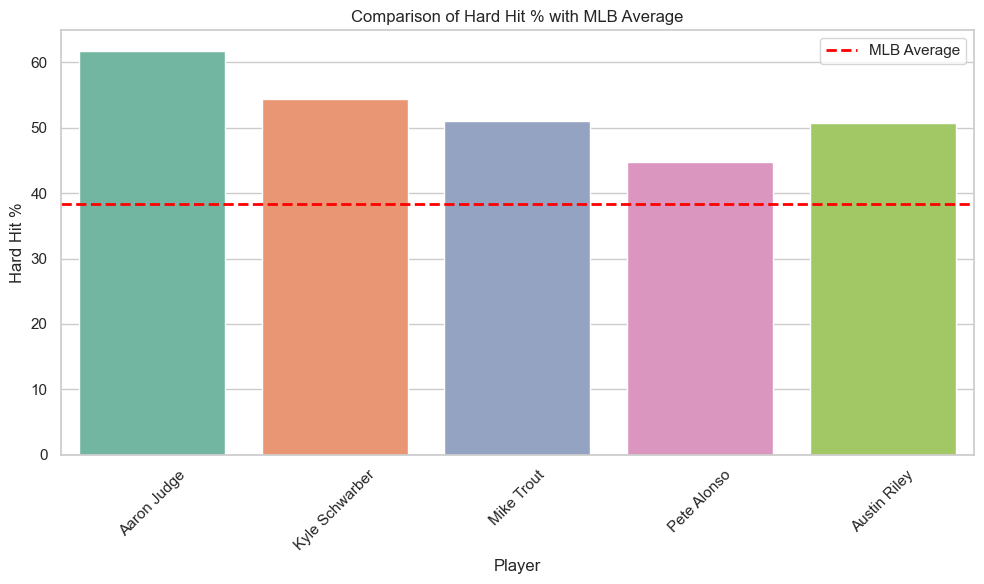

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='hard_hit_percent', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=hard_hit_league, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('Hard Hit %')
plt.title('Comparison of Hard Hit % with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

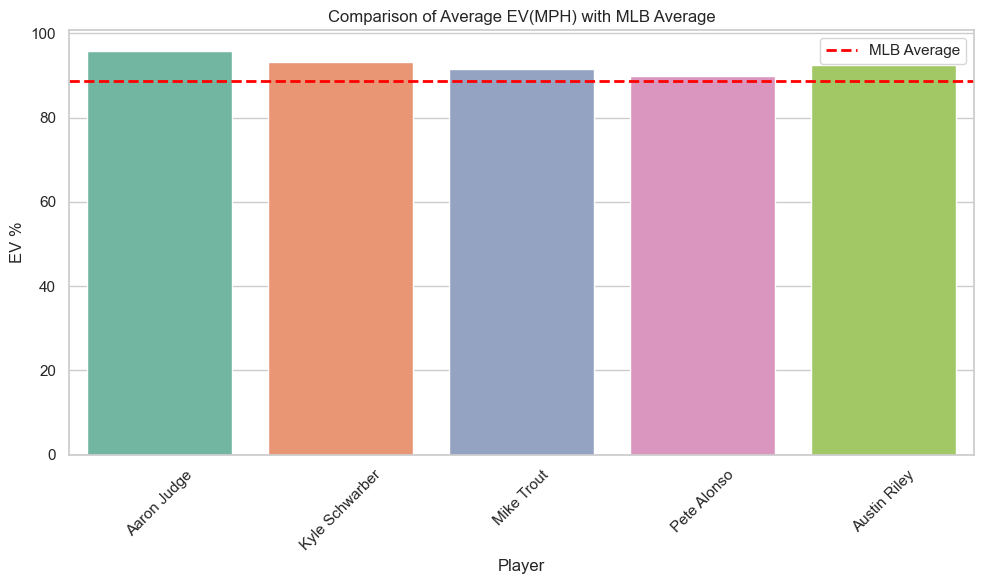

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='exit_velocity_avg', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=exit_velocity_league, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('EV %')
plt.title('Comparison of Average EV(MPH) with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

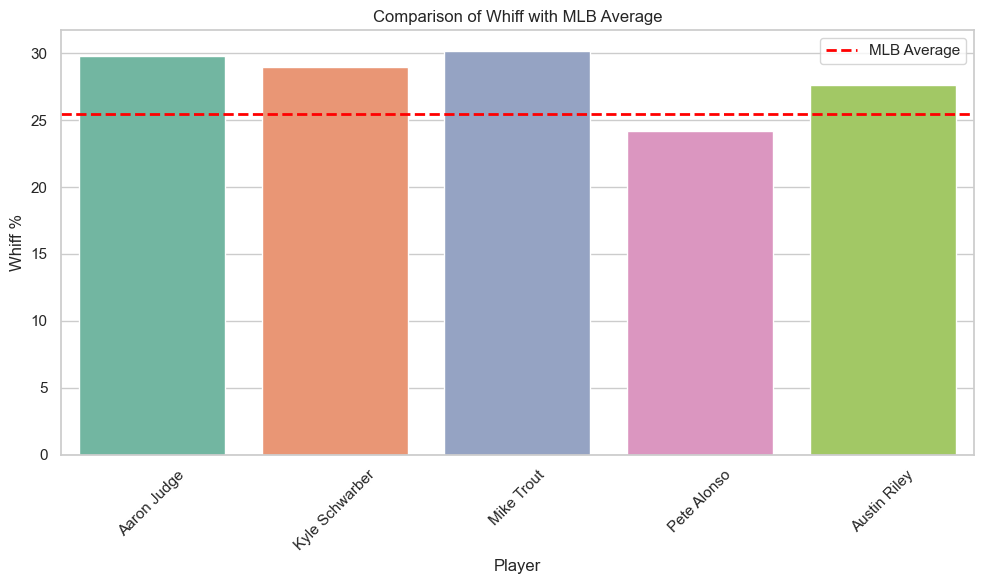

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='whiff_percent', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=whiff_league, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('Whiff %')
plt.title('Comparison of Whiff with MLB Average')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

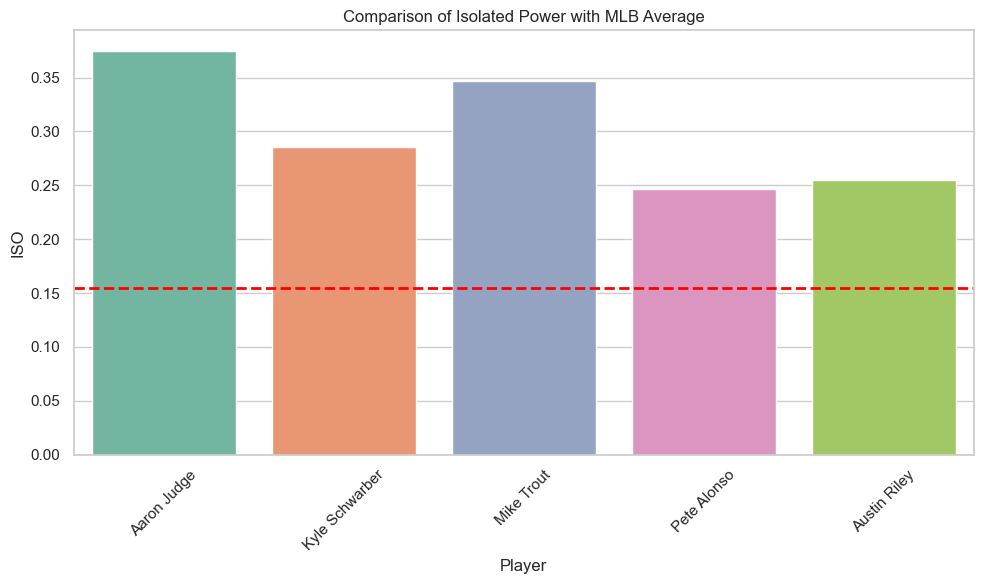

In [87]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='isolated_power', data=top5_hr_players, palette='Set2')

# Add the MLB average line to the plot
plt.axhline(y=mlb_200_pa_iso, color='red', linestyle='--', linewidth=2, label='MLB Average')

# Set the plot labels and title
plt.xlabel('Player')
plt.ylabel('ISO')
plt.title('Comparison of Isolated Power with MLB Average')
plt.xticks(rotation=45)
#plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

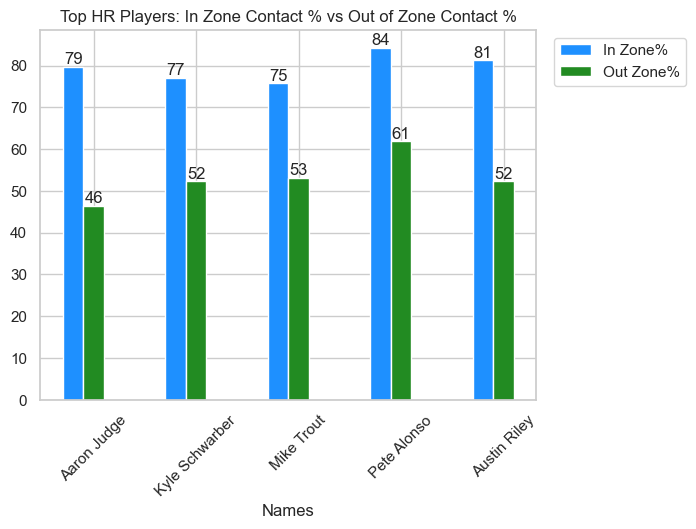

In [104]:
players = top5_hr_players['name']
in_zone = top5_hr_players['iz_contact_percent']
out_zone = top5_hr_players['oz_contact_percent']


# Set up the figure and axes
fig, ax = plt.subplots()

# Create the bar chart
index = range(len(players))
bar_width = 0.2

# Plotting HR
iz_bars = ax.bar(index, in_zone, bar_width, label='In Zone%', color='dodgerblue')

# Plotting RBI
oz_bars = ax.bar([i + bar_width for i in index], out_zone, bar_width, label='Out Zone%', color='forestgreen')

ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(players, rotation=45)
def add_value_annotations(bars, distance):
    for bar in bars:
        width = bar.get_width()
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height + distance, str(int(height)), ha='center', va='bottom')

#plt.axhline(y=iz_contact_percent_league, color='red', linestyle='--', linewidth=2, label='MLB Average')
# Set the x-axis label
ax.set_xlabel('Names')

# Set the title
ax.set_title('Top HR Players: In Zone Contact % vs Out of Zone Contact %')

# Display the legend
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
add_value_annotations(iz_bars, 0)

# Add value annotations to Out of Zone Contact % bars
add_value_annotations(oz_bars, 0)

# Show the bar chart
plt.show()